## Machine Leanrning Nano Degree
### Capstone Project 

## Media Product Classification

### Nagaraju Budigam
#### Dec 01 2017




# I. Definition

## Project Overview

*Note: This is the original problem that I am developing at production level. Due to company compliance policies original datasets are not exposed, however the provided datasets are resembling the original datasets.*

Indix is a **Product Intelligence** company based in Seattle, that currently offers a cloud-based product information platform. It is also building a broad and deep product catalog to enable mobile and desktop apps and websites to become product-aware. Indix provides access to APIs that enable developers to build product-aware applications. 

As mentioned above, Indix hosts the world’s largest collection of programmatically accessible structured product information in the cloud. The products in our database belong to 25 verticals and that translates approximately to 6000 sub-categories. Every product that we carry in our database gets stamped with information about the “category” it belongs to. 

Indix's services are centered on proprietary algorithms that structure crawled product data and a data-as-a-service business model.

The database offers coverage for most consumer retail product categories. The database also includes many industrial and business-to-business products. Indix provides brands and retailers with access to data such as specifications, facets, availability, assortment, promotions, and real-time pricing information. In comparison to offerings from Google, which are influenced by Google's utilization of relevance algorithms, or Amazon, which is limited to only the products in its own catalog, Indix's infinite product catalog helps all client-facing digital media and environments become more product-aware.


## Problem Statement

As Indix has the tons of data collected programatically from web, it has become a challenging task to classifying a product into a particular category, which is very important to serve various use cases – like, helping search, performing product matching, providing category specific insights, and so on. 

### From the project overview and project statement it is clear that, the problem of stamping every product in our catalogue into a category is a **Classification** problem in **Machine Learning**. We have a handful of techniques and methods in Machine Learning to tackle this kind of real world probems.

### To be more specific, here the stamping every product in our catalogue is a **Multi Class Classification** problem. 

#### All the features in the training data set are categorical (text data) and it is clear that this is problem requires to apply Natural Language Processing techniques, as we are dealing with textual data to convert this textual data into a numerical form. For achieving this we are using library Countvectorizer, provided by sklearn, which will lower case the input, remove all punctuation marks, remove stop words, performs tokenization and constructs a bag of words model, by using which we construct a vector for each document of the input and feed it into a machine learning algorithm.


#### As mentioned below, training dataset contains storeid, url, additionalAttributes, breadcrumbs and label features. However, we are considering breadcrumbs as the input features because most of the values of other features are missing (null and NaNs) and they are very less informative, hence not contributing to predict the label of an unknown product. This statement is being justified in the free form visualization section, where we plotted a graph to understand the feature importance. So, it’s clear that breadcrumbs will our input feature and lable would be output that will be predicted by our machine learning model. #### 

<img src="images/fiture_importance.png" height="1000" width="1000">


## Datasets and Inputs

The training dataset contains storeid, url, additionalAttributes, breadcrumbs and label features.

<img src="images/sample.png" height="1000" width="1000">

### Input Features: 
>### storeid, url, additionalAttributes, breadcrumbs 

### Output: 
> ### Product Label

### Input Features Description:

* **storeId** - a unique number for identifying a website, numerical data, discrete

* **url** - url of a product page.

* **additionalAttributes**  - Product attribute related to a particular product. These are key, value pairs that can be found in tabular format as product information for most products in e-commerce websites. This is a categorical data. 

* **An example of additionalAttributes** 
{"ASIN": " B000JJRY9M",
    
    "Amazon Bestsellers Rank": " in DVD & Blu-ray (See Top 100 in DVD & Blu-ray)",

    "Average Customer Review": " Be the first to review this item",

    "Classification": " Exempt",

    "DVD Release Date": " 26 Feb. 2007",

    "Format": " AC-3, Colour, Dolby, DVD-Video, PAL",
    
    "Language": " English",
    
    "Number of discs": " 1",
    
    "Region": " Region 2 (This DVD may not be viewable outside Europe. Read more about
    
    DVD formats.)",
    
    "Run Time": " 287 minutes",
    
    "Studio": " Hip-O Records"}
    

* **breadcrumbs** - breadcrumb captured at the page. Breadcrumbs typically appear horizontally across the top of a Web page, often below title bars or headers. This is a categorical data.

* **An example of breadcrumb**
    subjects > travel > world regions > europe > european nations > france


* **label** - The class to which a product belongs. Values belong to the finite set (‘books’,’music’,‘videos’,’rest’). This is a categorical data.

    It is possible that for some products only one among (2) or (3) might be available.  It means that we may not have data for features 2 and 3 some times.

    The problem statement is to classify the products into any one of the buckets
(i) Books
(ii) Music
(iii) Videos
(iv) Rest - A default class for products which doesn’t belong to (i),(ii) or (iii) category.



## Solution Statement

In this submission I have built a Classifier, which lables a unknown product by considering the breadcrumb as input to the model.

**Steps followed for building an efficient Multi Class Classifier:**

* Data Exploaration - Data Exploration provides good insights of the training dataset, such noise rate in the dataset, no.of samples avaialble for each category/label.
 

* Algorithms and Techniques - I have picked up 3 supervised algorithms DecisionTreeClassifier,  MultinomialNB and SVC.

    
* Evaluation Metrics Selection - I am using Accuracy and F-beta Score as the evalaution metrics to decide and pick a good model among the 3, I mentioned above.    


* Data Preprocessing - Remove noise, such as stop words, special characters, numbers.
    
   
    
* Feature Selection - Select the right features that better describes the label of a product, here **breadcrumbs** feature is more helpful in predcting the label of a product than other features as most their values are NaNs or null.
    
    
* Feature Transformation - Transform the categorical data into numerical form.



* Train and Test Data Split - Split the traing dataset into trainig and test set, 80% and 20% respectively.


* Intial Model Training and Evaluation - Train the 3 models, DecisionTreeClassifier,  MultinomialNB and SVC and Calculate the performance metrics accuracy and f-beta score.


* Model Selection - Select the model that has the best accuracy and f-beta score.


* Hyper Parameter Tuning - Perform the hyper parameter tuning using grid search and find out the best parameter combination.


* Training the Final Model - Train the selected model by passing the best parameters combination obtained in Hyper paramter tuning step.


* Prediction - Perform the prediction on the unknown dataset.

## Metrics
### Accuracy:

Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

#### Accuracy = true positives + true negatives/dataset size

Well, Accuracy is calculated as the portion of true labelled instances to total number of instances. The questions are what is wrong with accuracy that we need other performance measures? The problem is that in some datasets we can achieve high accuracy with weak models such as a dummy classifier to classify instances with the most frequent label. In cases such as outlier detection or in any dataset that a large portion of samples are of one class label the dummy classifier can achieve a high accuracy such as 80%(in cases that 80% of data are of the majority class label). This is while stronger models may even have lower accuracy. This is called the Accuracy Paradox. Hence, we usually prefer to use other performance measures such as Precision, Recall, F-measure or etc.

Hence I feel that accuracy is not enough and we need a report of classifier about the precision and recall that can better understood through f-beta score.

### F-beta Score:

* F-beta score treats both precision and recall with same importance, when beta=1, let’s say we need model which care a bit more about precision than recall, then we want something more skewed towards precision.
* Smaller the beta the model more skewed towards precision.
* Larger the beta the model more skewed towards recall.
* Note: Finding a good value of beta requires a lot of intuition of data and a lot of experimentation.

** Precision ** = `[True Positives/(True Positives + False Positives)]`

Example : In case of a spam filter, it tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

** Recall(sensitivity)** = `[True Positives/(True Positives + False Negatives)]`

Example: In case of a spam filter,tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam.


**$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$**



##### So, I would like to use accuracy and f-beta score as an evaluation metrics to access the performance of the classifier. I would like to use the beta value as 0.5, so my classifier is a bit skewed towards the precision.

# II. Analysis

## Data Exploration

In [59]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.options.display.max_colwidth=200

#load the training data
training_dataset=pd.read_csv('train.csv',encoding='ISO-8859-1')
#show first few rows
training_dataset.head()

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-piano---vocal---guitar/12005673,Contributed by=Toto;Format=Paperback;Number of Pages=66;Walmart No.=9781603781558;ISBN-13=9781603781558;Publish Date=Aug 2009;ISBN-10=1603781552;Publisher=Hal Leonard Corp,books > art music & photography > music,books
1,NaN,NaN,NaN,best buy > computers & tablets > computer cards & components > memory ram > desktop memory,rest
2,23,https://www.walmart.com/ip/34441317,NaN,music on cd or vinyl > rock music on cd or vinyl > alternative rock music on cd or vinyl,music
3,26,https://www.overstock.com/Books-Movies-Music-Games/The-New-Cooks-Tour-of-Sonoma/523652/product.html,NaN,books & media > books > cooking & food books > general cooking,books
4,22,http://www.target.com/p/amore-version-ii/-/A-16771282,NaN,"target > movies, music & books > music > classical",music


### Exploratory Visualization

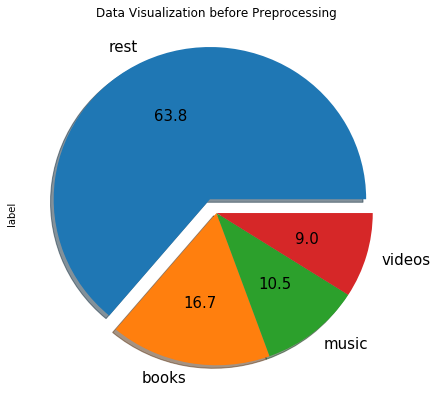

In [60]:
# plot pie chart to visualize the data
training_dataset.label.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='Data Visualization before Preprocessing',explode=(0.1,0,0,0),fontsize=15)

In [3]:
print('Training Dataset Information')
training_dataset.info()

Training Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 5 columns):
storeId                 1770 non-null object
url                     1094 non-null object
additionalAttributes    772 non-null object
breadcrumbs             4874 non-null object
label                   4896 non-null object
dtypes: object(5)
memory usage: 191.3+ KB


In [61]:
print('Training Dataset Description')
training_dataset.describe()

Training Dataset Description


,storeId,url,additionalAttributes,breadcrumbs,label
count,1770,1094,772,4874,4896
unique,9,1094,771,2700,4
top,23,http://www.amazon.com/dp/B003CEN6TI?psc=1,Country of Origin=United States,books,rest
freq,425,1,2,146,3126


## Algorithms and Techniques:

As per the project problem statement, it is clear that we need to employ the Supervised Machine
Learning Algorithms for predicting label of unknown product label. Before we train our models, it’s
important to understand that on what kind of data these algorithms operate. As a rule of thumb all
the machine learning algorithms takes numerical data as input and process them and learn things
and help us in predicting/classifying unknown values. So, first we have to remove all the noise from
the input data, such as lower casing all the text, removing punctuations, removing stop words and
then we have to perform tokenization and construct bag of words. So, we can represent each
document of the input feature into a vector and pass it to supervised model.

### Implementing Bag of Words in scikit-learn ###

** Data preprocessing with CountVectorizer() **

The CountVectorizer function aids us in cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

* `lowercase = True`
    
    The `lowercase` parameter has a default value of `True` which converts all of our text to its lower case form.


* `token_pattern = (?u)\\b\\w\\w+\\b`
    
    The `token_pattern` parameter has a default regular expression value of `(?u)\\b\\w\\w+\\b` which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


* `stop_words`

    The `stop_words` parameter, if set to `english` will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

The `get_feature_names()` method returns our feature names for this dataset, which is the set of words that make up our vocabulary for 'documents'.

You can take a look at all the parameter values of your `count_vector` object by simply printing out the object as follows:

 `CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)`

As we have transformed the feature breadcrumbs into a bag of words model and then representing
each document as a numerical vector, we have to transform the feature label also into numerical
form. We are achieving this talk by using the library LableEncoder, which is provide by sklearn.

### Label Encoder:
Label Encoder constructs a dictionary where each label is mapped to a number.
After we transform the input into right form, I would like to try feed in this input to the the following
algorithms and based on the performance metrics mentioned above, would like to pick the best
one.

## Multinomial Naive Bayes:
* Bayes theorem calculates the probability of an event occurring, based on certain other probabilities that are related to the event.
* The Bayes formula is as follows:

<img src="images/bayes_formula.png" height="242" width="242">
* Bayes theorem uses the “naive” assumption that all the features are independent of each other and hence it doesn’t bother about the order.
* Multinomial Naive Bayes implements the naive bayes algorithm for multinomially distributed data.
* This is one of the most frequently used algorithm in text classification, where we transform the text data into a word vector.
* This is very easy to understand, straight forward and simple.
* Naive Bayes classifier will converge quicker than discriminative models like logistic regression, so we need less training data and even if the NB assumption doesn't hold, a NB classifier still often performs surprisingly well in practice.
* The reason why I have selected this algorithm is that, we are dealing with textual data in the current problem and we really don’t bother about the order of features and assume that all features are independent of each other. It makes sense to perform probabilistic analysis to classify a product based on the breadcrumdata.

## Decision Trees:

* By using Decision Trees, we create a model that predicts the value of a target variable by learning simple decision rules inferred from the input features.
* Easy to interpret and understand, we can even view the final model.
* Decision Trees as non-parametric, so we don't have to worry about outliers or whether the data is linearly separable or not.
* Example: Decision trees easily can take care of cases where we have class A at the low end of some feature x, class B in the mid-range of feature x, and A again at the high end.
* The time complexity of decision tree algorithms is logarithmic (i.e., predicting data), so it comes really handy to when we want to train a model huge data set, unlike neural networks as they consume so much time to train the model.
* The reason why I have chosen decision tree as one of my supervised algorithms is that breadcrumbs depicts one of the best examples of hierarchical (in the form of tree data structure) data.
* **Example:**
    * books > romance > The half girlfriend
    * books > romance > Two States

## Support Vector Classifier:

The advantages of support vector machines are:
* SVCs are highly accurate, provide nice theoretical guaranty regarding the overfitting, and with the appropriate kernel they work really well and even if the data isn't linearly separable in the base feature space.
* SVCs are very effective and efficient in high dimensional space.
* As SVC supports kernel trick, we can model even non-linear relations.
* SVCs are memory efficient as they use a subset of training points in the decision function (called support vectors).
* The reason why I picked up SVC is that; it is very popular in text classification problems where very high-dimensional spaces are the norm.
* Note: This is model that turned out best and most efficient for the current problem with rbf kernel.
### For all the above mentioned algorithms we feed in a vector constructed using Bag of Words of Model of the training dataset.



## Benchmark

### Naive Predictor 

Please note that the the purpose of this naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally our base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place we could start from. 

Since I don't have any model to use as a base model, I am creating a dummy or naive predictor and assuming that, my naive model always predicted a product label as **rest**.

#### Performance Metrics of Naive Predictor: Accuracy score: 63.85%, F-score: 0.6882

In [64]:
print('Training Dataset size: ',training_dataset.shape[0])

# True Positves
tp=training_dataset.index[training_dataset.label=='rest'].shape[0]#original no.of rest labeld products

#False Positves
fp=training_dataset.shape[0]-tp

#True Negatives
tn=0

#False Negatives
fn=0

#Accuracy
accuracy=tp/(training_dataset.shape[0])

#Recall
recall = 1

#Precision
precision = accuracy # model has no TN and FN so, precision is same as accuracy

print('[ True Positves: ',tp,']\n[ True Negatives: ', tn, ']\n[ False Positives: ',fp, ']\n[ Flase Negatives: ',fn)
# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = ((1+0.5**2)*(precision*recall))/float((0.5**2*precision)+recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}%, F-score: {:.4f}]".format(accuracy*100, fscore))

Training Dataset size:  4896
[ True Positves:  3126 ]
[ True Negatives:  0 ]
[ False Positives:  1770 ]
[ Flase Negatives:  0
Naive Predictor: [Accuracy score: 63.8480%, F-score: 0.6882]


# III. Methodology

## Feature Selection


* From the data exploration, it is straight forward that store id, url and additional attribute features (most of these features are NaNs). Hence they don't contribute much or don't have sufficient information to predict the label of a product.


*  I believe that, the feature breadcrumbs are right feature to choose to determine label of the unknown product.

## Why choosing breadcrumbs feature alone?
As mentioned above, training dataset contains storeid, url, additionalAttributes, breadcrumbs and label features. However, we are considering breadcrumbs as the input features because
most of the values of other features values are missing (null and NaNs) and they are very less
informative, such as stored id it is just an id, url represents the url of a page, it has lot of missing
values and it’s a common intuition that it’s hard to decide or find something based on the url as
most of urls are being encoded and similarly additionalAttibures feature has lot of missing
values and seems to have lot of noise, such as urls, so many attributes that are hard to.


We may end up with absolutely wrong model by considering all the unnecessary and irrelevant
features that doesn’t have any information to predict the label of an unknown product. So, it
makes sense to not to use them, though there are few chances of losing some relevant
information from these features and run into trouble unnecessarily.


As these features are not contributing to predict the label of an unknown product, we are going
to consider breadcrumbs as the input feature. This statement is being justified in the free form
visualization section, where we plotted a graph to understand the feature importance. So, it’s
clear that breadcrumbs will our input feature and label would be output that will be predicted by
our machine learning model.

In [6]:
# Feature Selection
#requuired colums breadcrumbs and lables
final_col_list=['breadcrumbs','label']

# now training_dataset has only breadcrumbs and lable columms
training_dataset=training_dataset[final_col_list]



## Data Preprocessing
* In the data processing we drop all the null or NaN rows of breadcrumb and lable columns, we can ignore other columns they are not contributing to predict a label.


* In the second step we remove all the duplicate rows by considering label and breadcrumb columns as they are our point of interest.


* As the data of breadcrumb feature contains special characters, numbers, it would be wise to remove all such noise from the data, I have taken care of this step during the tokenization. 

I have used the dropna ()and drop_duplicates () functions provided by pandas library to
delete missing data such as null or NaN and to delete duplicate records, as the noise in the
training dataset may contribute to the hinder the predictive power of a model.


training_dataset.dropna(how='any',inplace=True)


training_dataset.drop_duplicates(inplace=True)


dropna() – drops the missing data
how – represents the criteria on which null values should be dropped, here
any it means that if any of the input features has null or NaN drop it.
Inplace – as the name suggests this operation will be performed on the cur
rent object in memory and the resulted data will be reassigned to it.


drop_duplicates() – drops the duplicate data

In [7]:
original_size=training_dataset.shape[0]
print('Original Dataset size : ',original_size)

# Drop NaN rows, if any
training_dataset.dropna(how='any',inplace=True)
print('Dataset size after noise removal: ',training_dataset.shape[0])

training_dataset.drop_duplicates(inplace=True)
print('Dataset size after duplcate removal: ',training_dataset.shape[0])

after_pp_size=training_dataset.shape[0]
print('Total noise removed from Training Dataset is : ',original_size-after_pp_size)

# show the first few rows of cleaned data set
training_dataset.head()

Original Dataset size :  4896
Dataset size after noise removal:  4874
Dataset size after duplcate removal:  2700
Total noise removed from Training Dataset is :  2196


,breadcrumbs,label
0,books > art music & photography > music,books
1,best buy > computers & tablets > computer cards & components > memory ram > desktop memory,rest
2,music on cd or vinyl > rock music on cd or vinyl > alternative rock music on cd or vinyl,music
3,books & media > books > cooking & food books > general cooking,books
4,"target > movies, music & books > music > classical",music


In [8]:
print('Features Description after Preprocessing')
training_dataset.describe()

Features Description after Preprocessing


,breadcrumbs,label
count,2700,2700
unique,2700,4
top,automotive > replacement parts > ignition parts > spark plugs & wires > spark plugs,rest
freq,1,1921


### Data Visualization (after Preprocessing)

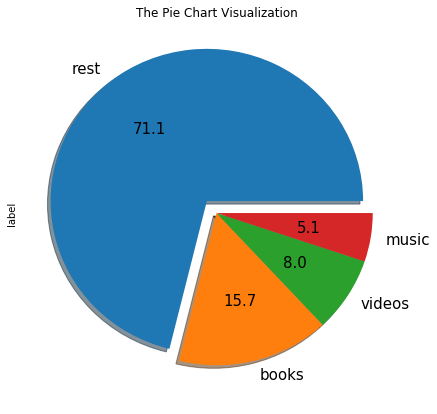

In [9]:
# plot pie chart to visualize the data
training_dataset.label.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='The Pie Chart Visualization',explode=(0.1,0,0,0),fontsize=15)

## Implementation

### Feature Transformation


* As we are dealing with the text or categorical data it is a rule of thumb to transform all such data into numerical form so we can feed it into the machine learning algorithms, as they work only on numerical inputs.


* We use **CountVectorizer** of sklearn machine learning library, where it construct a **Document Term Matrix** and construct **Bag of Words** for the input data.


* After transforming the breadcrumb data we have to transform the labels of each category to a numerical form, We achieve this by using the **Label Encoder** module of sklearn.

### Implementing Bag of Words in scikit-learn ###

** Data preprocessing with CountVectorizer() **

The CountVectorizer function aids us in cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

* `lowercase = True`
    
    The `lowercase` parameter has a default value of `True` which converts all of our text to its lower case form.


* `token_pattern = (?u)\\b\\w\\w+\\b`
    
    The `token_pattern` parameter has a default regular expression value of `(?u)\\b\\w\\w+\\b` which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


* `stop_words`

    The `stop_words` parameter, if set to `english` will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

The `get_feature_names()` method returns our feature names for this dataset, which is the set of words that make up our vocabulary for 'documents'.

You can take a look at all the parameter values of your `count_vector` object by simply printing out the object as follows:

 `CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)`

In [10]:
import nltk
import string

def tokenize(sentence):
    sentence=sentence.translate(str.maketrans('','',string.punctuation))
    tokens=nltk.word_tokenize(sentence)
    return tokens

# Encode or Transform the categorial labels into numrical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(training_dataset.label)
training_dataset.label=le.transform(training_dataset.label) 

# show first few lines after encoding labels
training_dataset.head()

,breadcrumbs,label
0,books > art music & photography > music,0
1,best buy > computers & tablets > computer cards & components > memory ram > desktop memory,2
2,music on cd or vinyl > rock music on cd or vinyl > alternative rock music on cd or vinyl,1
3,books & media > books > cooking & food books > general cooking,0
4,"target > movies, music & books > music > classical",1


## Training and Testing Data Split

As it is a rule of thumb to split the original input data set into training and testing data sets, where training dataset size should be 80% of the original data and testing dataset size would be remaining 20%.


I have used the library train_test_split provided by sklearn, for split the training and testing
data sets out of original data set.


train_test_split():


We mainly pass 4 parameters to this function that is features, labels, test set size and the
random state, where


Features: training input features
Labels: Labels/output related to the input features
Testset_size: test size, requires decimal value Ex: 0.2 mean 20%
Random state: to get the homogeneous train and testset across all runs.


In [11]:
from sklearn.model_selection import train_test_split

#Divide the data into trainign and test sets
X_train, X_test, y_train, y_test = train_test_split(training_dataset.breadcrumbs, 
                                                    training_dataset.label, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ('Training set has',X_train.shape[0],'samples.')
print ("Testing set has ",X_test.shape[0]," samples.")

Training set has 2160 samples.
Testing set has  540  samples.


## Transform the Categorical data into Numerical Form

* Construct a Document Term Matrix and Bag of Words Model for the input data.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(tokenizer=tokenize)
X_train=count_vec.fit_transform(X_train) # traiing data
X_test=count_vec.transform(X_test) # test data

## Algorithms and Techniques:

As per the project problem statement, it is clear that we need to employ the Supervised Machine Learning Algorithms for predicting label of unknown product label. So, I would like to try with the following algorithms and based on the performance metrics mentioned above, would like to pick the best one.


### Implementing Bag of Words in scikit-learn ###

** Data preprocessing with CountVectorizer() **

The CountVectorizer function aids us in cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

* `lowercase = True`
    
    The `lowercase` parameter has a default value of `True` which converts all of our text to its lower case form.


* `token_pattern = (?u)\\b\\w\\w+\\b`
    
    The `token_pattern` parameter has a default regular expression value of `(?u)\\b\\w\\w+\\b` which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


* `stop_words`

    The `stop_words` parameter, if set to `english` will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

The `get_feature_names()` method returns our feature names for this dataset, which is the set of words that make up our vocabulary for 'documents'.

You can take a look at all the parameter values of your `count_vector` object by simply printing out the object as follows:

 `CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)`

As we have transformed the feature breadcrumbs into a bag of words model and then representing
each document as a numerical vector, we have to transform the feature label also into numerical
form. We are achieving this talk by using the library LableEncoder, which is provide by sklearn.

### Label Encoder:
Label Encoder constructs a dictionary where each label is mapped to a number.
After we transform the input into right form, I would like to try feed in this input to the the following
algorithms and based on the performance metrics mentioned above, would like to pick the best
one.

## Multinomial Naive Bayes:
* Bayes theorem calculates the probability of an event occurring, based on certain other probabilities that are related to the event.
* The Bayes formula is as follows:

<img src="images/bayes_formula.png" height="242" width="242">
* Bayes theorem uses the “naive” assumption that all the features are independent of each other and hence it doesn’t bother about the order.
* Multinomial Naive Bayes implements the naive bayes algorithm for multinomially distributed data.
* This is one of the most frequently used algorithm in text classification, where we transform the text data into a word vector.
* This is very easy to understand, straight forward and simple.
* Naive Bayes classifier will converge quicker than discriminative models like logistic regression, so we need less training data and even if the NB assumption doesn't hold, a NB classifier still often performs surprisingly well in practice.
* The reason why I have selected this algorithm is that, we are dealing with textual data in the current problem and we really don’t bother about the order of features and assume that all features are independent of each other. It makes sense to perform probabilistic analysis to classify a product based on the breadcrumdata.

## Decision Trees:

* By using Decision Trees, we create a model that predicts the value of a target variable by learning simple decision rules inferred from the input features.
* Easy to interpret and understand, we can even view the final model.
* Decision Trees as non-parametric, so we don't have to worry about outliers or whether the data is linearly separable or not.
* Example: Decision trees easily can take care of cases where we have class A at the low end of some feature x, class B in the mid-range of feature x, and A again at the high end.
* The time complexity of decision tree algorithms is logarithmic (i.e., predicting data), so it comes really handy to when we want to train a model huge data set, unlike neural networks as they consume so much time to train the model.
* The reason why I have chosen decision tree as one of my supervised algorithms is that breadcrumbs depicts one of the best examples of hierarchical (in the form of tree data structure) data.
* **Example:**
    * books > romance > The half girlfriend
    * books > romance > Two States

## Support Vector Classifier:

The advantages of support vector machines are:
* SVCs are highly accurate, provide nice theoretical guaranty regarding the overfitting, and with the appropriate kernel they work really well and even if the data isn't linearly separable in the base feature space.
* SVCs are very effective and efficient in high dimensional space.
* As SVC supports kernel trick, we can model even non-linear relations.
* SVCs are memory efficient as they use a subset of training points in the decision function (called support vectors).
* The reason why I picked up SVC is that; it is very popular in text classification problems where very high-dimensional spaces are the norm.
* Note: This is model that turned out best and most efficient for the current problem with rbf kernel.
### For all the above mentioned algorithms we feed in a vector constructed using Bag of Words of Model of the training dataset.



## Creating a Training and Predicting Pipeline

In [13]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test,verbose): 
    results = {}
    training_start = time()
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    training_end = time() 
    results['train_time'] = training_end-training_start
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:sample_size])
    end = time()
    results['pred_time'] = end-start
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train[:sample_size])
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train[:sample_size], predictions_train[:sample_size], beta=0.5,average='macro')
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5,average='macro')
    # Success
    if(verbose):
        print ("{} trained on {} samples. [ Accuracy {:.4f}% , fbeta score {:.4f}]".
               format(learner.__class__.__name__, sample_size,(100.0*results['acc_test']),(results['f_test'])))
        #print (results)
    return results

def evaluate(accuracy,f1,results):
    fig, ax = pl.subplots(2, 3, figsize = (20,8))
    bar_width = 0.19
    colors = ['#F55826','#00A0A0','#E5B506','#284ABC','#59A857']
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training Time")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Prediction Time")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.55), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics of Supervised Learning Models", fontsize = 18, y = 1.10)
    pl.tight_layout()
    pl.show()
    
final_results={}
def metrics_visualization(clfs,verbose):
    results = {}
    samples_100 = len(y_train)
    samples_10 = int((samples_100*0.1))
    samples_1 = int((samples_100*0.01))
    for clf in clfs:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        final_results[clf_name] = {}
        for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test,verbose)
            final_results[clf_name][i]= results[clf_name][i]

    evaluate(accuracy,fscore,results)    

## Initial Model Evaluation


Once we perform data pre-processing and transform, we try to fit above mentioned classification models and check which is performing good on the given dataset. You could see the performance metrics of various models fit on the 10%, 50% and 100% of dataset.



* I would like to use accuracy and f-beta score as an evaluation metrics to assess the performance of the classifier.

* As the dataset is unbalanced I would like to use f-beta score as the another evaluation metric, with beta being 0.5.

In the below code cell, DecisionTreeClassifier, MultinomialNB , and SVC models being implemented.
  - Using a `'random_state'` as 1 for the model that requires this parameter.
  - **Note:** In this implementation using the default settings for each model — We will tune one specific model in a later section.

DecisionTreeClassifier trained on 21 samples. [ Accuracy 82.9630% , fbeta score 0.6157]
DecisionTreeClassifier trained on 216 samples. [ Accuracy 93.5185% , fbeta score 0.9032]
DecisionTreeClassifier trained on 2160 samples. [ Accuracy 96.8519% , fbeta score 0.9778]
MultinomialNB trained on 21 samples. [ Accuracy 90.3704% , fbeta score 0.8722]
MultinomialNB trained on 216 samples. [ Accuracy 94.4444% , fbeta score 0.9284]
MultinomialNB trained on 2160 samples. [ Accuracy 96.6667% , fbeta score 0.9682]
SVC trained on 21 samples. [ Accuracy 90.0000% , fbeta score 0.8035]
SVC trained on 216 samples. [ Accuracy 93.3333% , fbeta score 0.8930]
SVC trained on 2160 samples. [ Accuracy 99.2593% , fbeta score 0.9907]


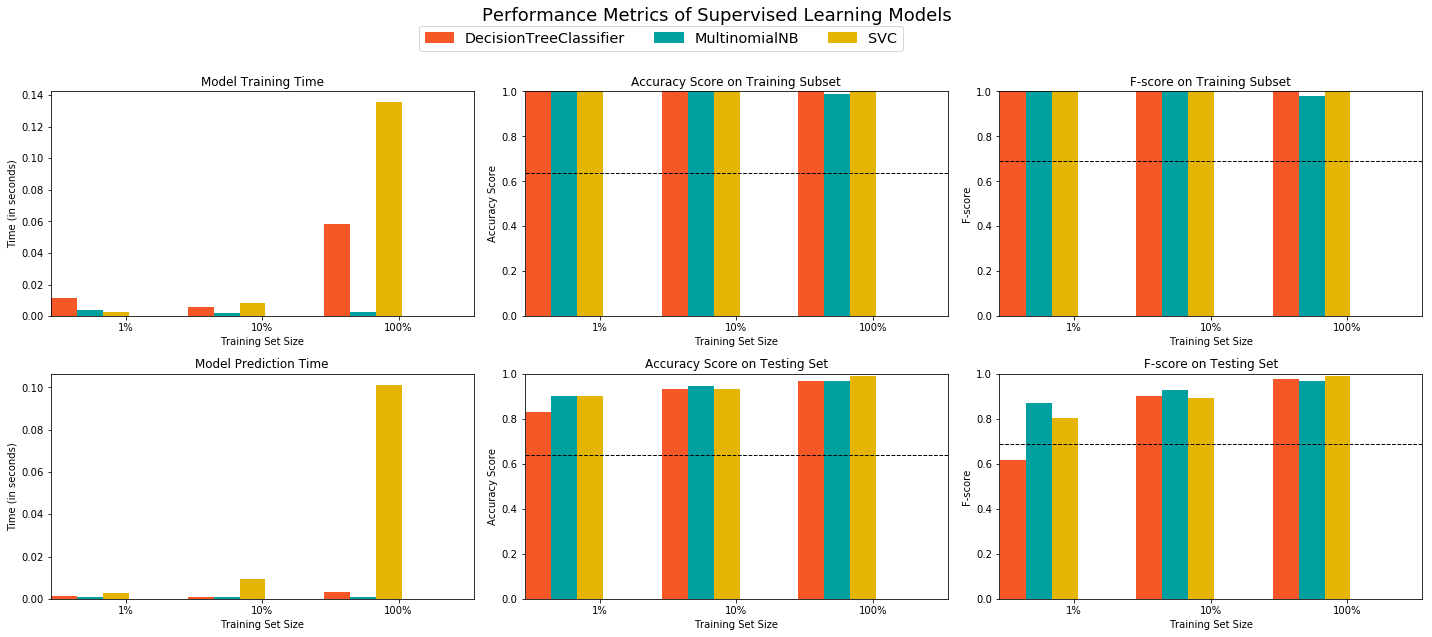

In [53]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import math

classifiers=[
DecisionTreeClassifier(random_state=1),
MultinomialNB(),
SVC(kernel="linear")]

metrics_visualization(classifiers[:5],verbose=True)

## Training Models with 1%, 10% and 100% of Training Datasets:

* We feed in the transformed data into the 3 models, DecisionTreeClassifier, MultinomialNB and SVC and train them.

### It's important to observe and understand the behaviour of these three learning algorithms when the training and testing samples vary from 1%, 10% and 100%.
    
    
  * One can clearly obeserve the behaviours of the learning models by looking into the Performace Metrics Visualization plot. As the number of training samples increases the accuracy and f-beta scores of a model is getting increased.

    > DecisionTreeClassifier trained on 21 samples. [ Accuracy 82.9630% , fbeta score 0.6157]

    > DecisionTreeClassifier trained on 216 samples. [ Accuracy 93.5185% , fbeta score 0.9032]

    > DecisionTreeClassifier trained on 2160 samples. [ Accuracy 96.8519% , fbeta score 0.9778]

    > MultinomialNB trained on 21 samples. [ Accuracy 90.3704% , fbeta score 0.8722]

    > MultinomialNB trained on 216 samples. [ Accuracy 94.4444% , fbeta score 0.9284]

    > MultinomialNB trained on 2160 samples. [ Accuracy 96.6667% , fbeta score 0.9682]

    > SVC trained on 21 samples. [ Accuracy 90.0000% , fbeta score 0.8035]

    > SVC trained on 216 samples. [ Accuracy 93.3333% , fbeta score 0.8930]

    > SVC trained on 2160 samples. [ Accuracy 99.2593% , fbeta score 0.9907]

## Complications raised during the coding process:


One Challenge I faced and have overcome with the data pre-processing step is that, during my
initial implementation I didn't perform stop word filtering so it costed a lot and contributed to a huge
document term matrix or bag of words model and my model suffered from bias as the model
captured most frequent stop words and also model took long time to train. So, during my
refinement phase I have performed the stop word filtering, now the model got rid of the bias
injected by stop words and it is performing really well.


## Refinement

### Hyper Parameter Tuning

* **In the Performance Metrics Visualization , we could see a horizontal dashed line in both accuracy and f-beta score plot, which represents the accuracy and f-beta socres of the base model i.e Naive Preidctor. **


* **It's clear that all the three models are performing far better than our base model, Naive Predictor, where it has Accuracy score: 63.8480% and F-beta score: 0.6882.**


* We could see a couple of other metrics apart from accuracy and f-beta score, in the performance metrics visualization plot, such as traing time and predictin time. So, it would be better to look into all the performance metrics and take a constructive decision, while choosing a model. So, we can consider these metrics in the priority Order I mentioned below.
>1. Accuracy
>2. F-beta Score
>3. Prediction Time
>4. Training Time

* Hence, we have to select the best model among the three DecisionTreeClassifier,  MultinomialNB and SVC by considering the above mentioned metrics. It is straight forward that SVC is dominating other two classifiers interms of performance. That is it has the best accuracy 99.259% and f-beta score 0.9907. So, we select the SVC as the right classifier for our task.


* So, by using gird search I have performed the hyper parameter tuning to get the best parameter combination of the model.


* It is noticed that even after taking the best parameter combination returned by grid search, the accuracy and f-beta scores of the optimized model is not improved, however by using SVC I could achieve **99.25% accuracy and 0.9907 f-beta score.**



## Parameters used for Grid Search

`hyper_parameters = [{'kernel': ['rbf'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]`
                    
                    

In [39]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#Initialize the classifier
clf = SVC(kernel='linear')

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scorer = make_scorer(fbeta_score,beta=0.5,average='macro')
grid_obj = GridSearchCV(clf,tuned_parameters,scoring=scorer,cv=10,verbose=True,n_jobs=2)
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta = 0.5,average='macro')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions,beta = 0.5,average='macro')))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    6.2s finished


Unoptimized model
------
Accuracy score on testing data: 0.9926
F-score on testing data: 0.9907

Optimized Model
------
Final accuracy score on the testing data: 0.9926
Final F-score on the testing data: 0.9907


# IV. Results

## Model Evaluation and Validation


### Classifier Performance Before Vs. After Hyper Parameter Tuning

#### Unoptimized model ( before Hyper Parameter Tuning )
* Accuracy score on testing data: 99.26%
* F-score on testing data: 0.9907

#### Optimized Model ( after Hyper Parameter Tuning )
* Final accuracy score on the testing data: 99.26%
* Final F-score on the testing data: 0.9907

**We could don't see any improvement in the accuracy and f-beta scoe of the as we have already achieve a decent score during trainig itself.**

**I believe that every model will have a certain threshold point after which it's hard to improve it's performace, and also if we continue to do so, we may see that the performace of a model may go down, as there is a chances of overfitting.**



In [54]:
print('The Best Parameter combination for the Final Model.')
best_clf.get_params()

The Best Parameter combination for the Final Model.


{'C': 1000,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Best Hyper Parameters obtained from Grid Search

The best Parameter combination for the Final Model.

{**'C'**: 1000,
 
 **'cache_size'**: 200, - *this is same as default paramter value*
 
 **'class_weight'**: None, - *this is same as default paramter value*
 
 **'coef0'**: 0.0, - *this is same as default paramter value*
 
 **'decision_function_shape'**: 'ovr', - *this is same as default paramter value*
 
 **'degree'**: 3, - *this is same as default paramter value*
 
 **'gamma'**: 'auto', - *this is same as default paramter value*
 
 **'kernel'**: 'rbf',
 
 **'max_iter'**: -1, - *this is same as default paramter value*
 
 **'probability'**: False, - *this is same as default paramter value*
 
 **'random_state'**: None, - *this is same as default paramter value*
 
 **'shrinking'**: True, - *this is same as default paramter value*
 
 **'tol'**: 0.001, - *this is same as default paramter value*
 
 **'verbose'**: False - *this is same as default paramter value*
 }
 
 

## Validation of Robustness

### Training the Model on differnt Random States (from 0 to 9)

Training the Model on differnt Random States (from 0 to 9)

random_state:  10  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  19  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  28  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  37  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  46  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  55  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  64  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  73  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  82  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  91  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]

### It's clear from the above metrics that the classifier is robust as it doesn't tend to make any error while the random state is getting changed.

In [52]:
from sklearn.svm import SVC

print('\nTraining the Model on differnt Random States (from 0 to 9)\n')

# Train the calssifier with the best parameters obained from Hyper Parameter Tuning step

for rand_state in range(10,100,9):
    clf = SVC(C=1000.0,kernel='rbf',random_state=rand_state)
    clf.fit(X_train, y_train)
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    print ("random_state: ",rand_state," = > [ Accuracy: ",accuracy_score(y_test, predictions),", F-beta: ",(fbeta_score(y_test, predictions,beta = 0.5,average='macro')),"]")



Training the Model on differnt Random States (from 0 to 9)

random_state:  10  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  19  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  28  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  37  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  46  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  55  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  64  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  73  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  82  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]
random_state:  91  = > [ Accuracy:  0.992592592593 , F-beta:  0.990710826625 ]


## Justification 

<img src="images/visuals.png" height="1000" width="1000">


### **From the Performance Metrics Visualization , we could see a horizontal dashed line in both accuracy and f-beta score plot, which represents the accuracy and f-beta socres of the base model i.e Naive Preidctor. **


### **It's clear that all the three models are performing far better than our base model, Naive Predictor, where it has Accuracy score: 63.8480% and F-beta score: 0.6882.**


* We could see a couple of other metrics apart from accuracy and f-beta score, in the performance metrics visualization plot, such as traing time and predictin time. So, it would be better to look into all the performance metrics and take a constructive decision, while choosing a model. So, we can consider these metrics in the priority Order I mentioned below.
>1. Accuracy
>2. F-beta Score
>3. Prediction Time
>4. Training Time

* Hence, we have to select the best model among the three DecisionTreeClassifier,  MultinomialNB and SVC by considering the above mentioned metrics. It is straight forward that SVC is dominating other two classifiers interms of performance. That is it has the best accuracy 99.259% and f-beta score 0.9907. So, we select the SVC as the right classifier for our task.


* So, by using Grid Search Techniques, I have performed the hyper parameter tuning to get the best parameter combination for the selected model i.e SVC. Once the hyper parameters are obtain a model has been trained by using them and computed scores such as accuracy and f-beta score.


* It is noticed that even after taking the best parameter combination returned by grid search, the accuracy and f-beta scores of the optimized model is not improved, however by using SVC we could achieve great **accuracy 99.25% and f-beta score 0.9907.**

* It is also noticed that, after Training the Model on differnt Random States (from 0 to 9), the selected model has proved that it's producing the consistent results.

### **I strongly believe that these results and the solution are significant enough to have solved the problem posed in the  project.**


### Final Model Training

Train the final model by usng best paremeter combination as mentioned above.

Note: I feel that, it doesn't really make any differece even if we use the parameter we used druring the intilal evaluaion. As the scores of optimized and unoptimized are same.

Model Parameter used during initial evaluation: kernel : liner

Best Parameter combination obtained after hyper parameter tuning: C=1000.0,kernel='rbf'

#### *Note: However the scores of optimized and unoptimized models is same, I still want to go with the best Parameter combination obtained after hyper parameter tuning.*


In [49]:
from sklearn.tree import DecisionTreeClassifier
print('Training the Final Model started')

# Train the calssifier with the best parameters obained from Hyper Parameter Tuning step
clf = SVC(C=1000.0,kernel='rbf',random_state=1)

clf.fit(X_train, y_train)

print('Training the Final Model completed')

Training the Final Model started
Training the Final Model completed


## Predict using Final Model

Original test dataset size  4517
Test dataset size after droping NaNs  4508
Test dataset size after droping duplicates  2669
Transforming Categorica Data to Numerical started
Transforming Categorica Data to Numerical completed
Performing Prediction testdataset started
Performing Prediction testdataset completed
Writing Predicted output to the file predicted_output.csv started
Wrote predicted output to the file predicted_output.csv Sucessfully!!!


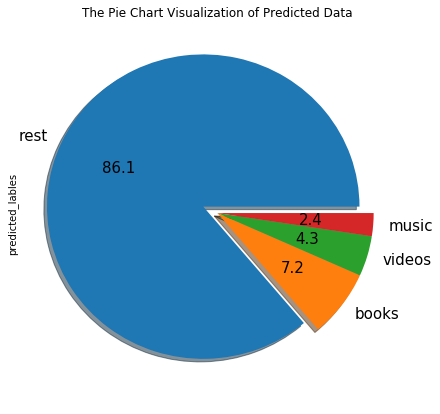

In [50]:
# Load the test dataset
test_dataset=pd.read_csv('evaluation.csv',encoding='ISO-8859-1')
test_dataset.head()
print('Original test dataset size ', test_dataset.shape[0])
test_dataset.dropna(subset=['breadcrumbs'],inplace=True)
print('Test dataset size after droping NaNs ', test_dataset.shape[0])
test_dataset.drop_duplicates(subset=['breadcrumbs'],inplace=True)
print('Test dataset size after droping duplicates ', test_dataset.shape[0])

print('Transforming Categorica Data to Numerical started')
testset_tran=count_vec.transform(test_dataset.breadcrumbs)
print('Transforming Categorica Data to Numerical completed')

print('Performing Prediction testdataset started')
predicted_lables=clf.predict(testset_tran)
print('Performing Prediction testdataset completed')

test_dataset['predicted_lables']=le.inverse_transform(predicted_lables)
print('Writing Predicted output to the file predicted_output.csv started')
test_dataset.to_csv('predicted_output.csv')
print('Wrote predicted output to the file predicted_output.csv Sucessfully!!!')

test_dataset.predicted_lables.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='The Pie Chart Visualization of Predicted Data',explode=(0.1,0,0,0),fontsize=15)

# V. Conclusion

## Free-Form Visualization

* The below plot shows the use of RandomForestClassifier to evaluate the importance of features of the current dataset.


* The red bars are the feature importances of the forest, along with their inter-trees variability.


* **As expected, the plot suggests that breadcrumbs feature is more informative, while the remaining are very less.**

In [75]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

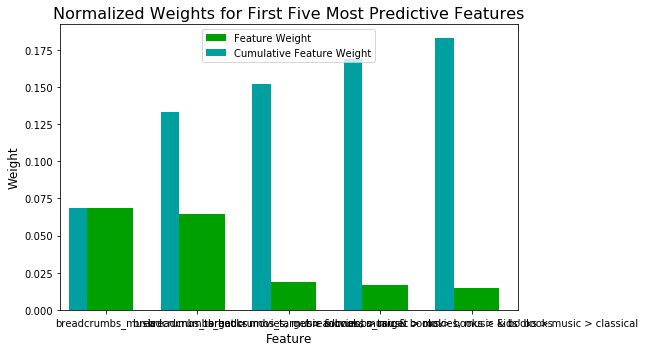

In [79]:
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
dataset=pd.read_csv('train.csv',encoding='ISO-8859-1')

feature_cols=['url','additionalAttributes','breadcrumbs']
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
dataset[feature_cols]
features_final = pd.get_dummies(dataset[feature_cols])

# Encode or Transform the categorial labels into numrical values
le = preprocessing.LabelEncoder()
le.fit(dataset.label)
dataset.label=le.transform(dataset.label) 


# Import a supervised learning model that has 'feature_importances_'
clf1=RandomForestClassifier(random_state=1)
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = clf1.fit(features_final,dataset.label)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feature_plot(importances, features_final,dataset.label)

## Reflection

In this project I have built a Multi Class Classifier, which lables a unknown products into any one of the buckets (i) Books (ii) Music (iii) Videos (iv) Rest - A default class for products which doesn’t belong to (i),(ii) or (iii) category.

**Steps followed for building this pipeline:**

* **Data Exploaration**
    * Data Exploration provides good insights of the training dataset, such noise rate in the dataset, no.of samples avaialble for each category/label and what kind data we have whehter it continues, categorical and descrete. 
    * In the given data set we have only categorical data except storeid which just an id represents that a store (and don't provide any information about the label). 
 

* **Algorithms and Techniques**
    * So, once we explore the data, we have to decide, what algorithms could better help us in build a multi class classifier, by considering their strengths and weaknesses. 
    * Hence I have picked up 3 supervised algorithms DecisionTreeClassifier,  MultinomialNB and SVC, for this task.

    
* **Evaluation Metrics Selection**
    * Evaluate metrics plays a vital role while choosing between or picking the best model. 
    * It is also important to make use of the right metrics that suits our problem statement, than picking something random. 
    * I felt that for the given data set and the problem accuracy and f-beta score are the best fit. So, I've picked Accuracy and F-beta Score as the evalaution metrics to decide and pick a good model among the 3, that I mentioned above.    


* **Data Preprocessing**
    * This is one of the most cruicial steps of arriving at any machine learning problem in general. 
    * Because if we fail to identify outliers, noise, wrong data we will endup with some scary solution. 
    * Sometimes it ispossible that we may loose some valuable data during this step. 
    * It is important that we perform this step with at most care. 
    * So, it is clear from the data exploration step that we have lot of noise in the given dataset. Hence, we have to Remove noise, such as stop words, special characters, numbers.
 
>####  One Challenge I faced and have over come with this step is that, during my intial implemenation I didn't perform stopword filtering so it costed a lot and contributed to a huge document term matrix or bag of words model and my model suffered from bias as the model caputered most frequent stop words and also model took long time to train. So, during my refinement phase I have performed the stopword filtering, now the model got rid of the bais injected by stopwords and it is performing really well.
    
   
    
* **Feature Selection**
    * Selecting the right features that better describes the label of a product is very important.
    * It is also pretty staright forward that from data exploation breadcrumb is the only features that more informative than any other and is more helpful in predicting the label of an unkown product.
    * So, this would be the input feature for our model. 
    * On the other hand other features such as url, additionalAttributes are having lost of missing information in the form of NaNs or null.
    
    
* **Feature Transformation**
    * From the Data Exploration step it is clear that the data of breadcrumb and label features are categorical. 
    * So, before we feed it into any of the algorithms we have to transform them into numbercal form. 
    * The feature label is transformed into numrical form by using the LableEncoder provided by sklearn and similary breadcrumb feature is also transformed into numberical vector by using the CountVectorizer provided by skelarn.



* **Train and Test Data Split** 
    * The benefit of splitting a dataset into traing and testing subsets is that, we can avoid the impact of variance and baise of the training data on the model. 
    * A model which is trained on high bias data would underfit and a model which is trained on high variance data overfits. So, to avoid underfitting and overfitting it's good to split the dataset into some ratio of training and testing subsets and there by perform cross-validation.
    * Hence we, split the traing dataset into trainig and test set, 80% and 20% respectively.


* ** Model Training and Evaluation**
    * Feed in the transformed data into the 3 models, DecisionTreeClassifier,  MultinomialNB and SVC and train them. 
    * It's important to observe the behaviour of these three learning algorithms when the trained and testd the small sets of data that is when they trained and tested on 10%, 50% and 100% of the traing data set. 
    * One can clearly obeserve the behaviours of the learning models by looking into the Performace Metrics Visualization plot. As the number of training samples increases the accuracy and f-beta scores of a model is getting increased.

    > DecisionTreeClassifier trained on 21 samples. [ Accuracy 82.9630% , fbeta score 0.6157]

    > DecisionTreeClassifier trained on 216 samples. [ Accuracy 93.5185% , fbeta score 0.9032]

    > DecisionTreeClassifier trained on 2160 samples. [ Accuracy 96.8519% , fbeta score 0.9778]

    > MultinomialNB trained on 21 samples. [ Accuracy 90.3704% , fbeta score 0.8722]

    > MultinomialNB trained on 216 samples. [ Accuracy 94.4444% , fbeta score 0.9284]

    > MultinomialNB trained on 2160 samples. [ Accuracy 96.6667% , fbeta score 0.9682]

    > SVC trained on 21 samples. [ Accuracy 90.0000% , fbeta score 0.8035]

    > SVC trained on 216 samples. [ Accuracy 93.3333% , fbeta score 0.8930]

    > SVC trained on 2160 samples. [ Accuracy 99.2593% , fbeta score 0.9907]

  

* **Model Selection** - 
    * We could see a couple of other metrics apart from accuracy and f-beta score, in the performance visualization plot, such as traing time and predictin time. So, it would be better to look into all the performance metrics and take a constructive decision, while choosing a model. So, we can consider these metrics in the priority Order I mentioned below.
>1. Accuracy
>2. F-beta Score
>3. Prediction Time
>4. Training Time

    * Hence,we select the best model among the three DecisionTreeClassifier,  MultinomialNB and SVC by considering the above mentioned metrics. It is straight forward that SVC is dominating other two classifiers interms of performance. That is it has the best accuracy 99.259% and f-beta score 0.9907. So, we select the SVC as the right classifier for our task.


* **Hyper Parameter Tuning **
    * In machine learning we train a bunch of models with training data, then we use the cross validation data to pick the best models of these models and finally we test it with the testing data to make sure our model is good.
    * If we want to pick the best model of a learning algorithm which has more than one hyper parameter we use grid search technique.
    * Take can example of support vector machine algorithm, which has hyper parameters like kernel and gamma.
    * So, if we want to pick the best model out of a bunch of training models, we make table of all the possible values of the hyeper parameters and pick the best one. So, with the help of grid search technique we can pick the most optimal learning algorithm.
    * K-fold cross validation is a technique used to recycle the data. In k-fold cross validation k means the number of buckets. 
    * So, we we divide the training dataset into k buckets and train our model k times each time using a different bucket as testing set and remaining points as training set, then we average the results to get the final model. Note: While breaking the data into k buckets we choose the data points randomly to remove the hint of bias.
    * When we manually divide the training dataset into training and testing subsets, there is a possibility that we may keep some useful data into the testing set. So, when we run the model on such setting we may endup with picking the incorrect learning algorithm and leads to poor predictive power. To alleviate this sort of issues we use k-fold cross validation, where our traing algorithm will not miss out any training dataset point.
    * Hence we perform the hyper parameter tuning using grid search and find out the best parameter combination for the selcted model.


* **Training the Final Model** - Train the selected model by passing the best parameters combination obtained in Hyper paramter tuning step.


* **Prediction** - Perform the prediction on the unknown dataset and label them into any one of the buckets (i) Books (ii) Music (iii) Videos (iv) Rest - A default class for products which doesn’t belong to (i),(ii) or (iii) category.

## Improvement

There are some aspects of the implemented solution that may be improved:

* We have trained our model by just using a single feature (breadcrumbs) out 3 available features (url, additionalAttibutes, breadcrumbs). On the other hand the limitation with training a model on all features would be time consuming task and may result in wrong solution as most of the values of url and additionalAttibutes featres are missing.

* We may consider increasing the collected sample size in the future to improve the models. 

* I have noticed that data of breadcrumb feature has some spelling mistakes (very few words I have noticed), if we can include a spellchecker that may benefit the model to hold the right information about samples by correcting misspelled words.

* I have also noticed that a very few words(hardly 4 or 5) have inflectional forms such as cook, cooking, cooked, if we can root out the affect of inflectional forms by using a stemming module.

#### Note : In the current dataset I have noticed only few words that are misspelled and having inflectional forms, but when we want to tackle the huge amount of data, I feel that these module should be inlcuded as a part of the solution.